In [330]:
import pandas as pd
import datetime 
from pandas import Series, DataFrame
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [331]:
df = pd.read_csv("UBER.csv")

In [332]:
len(df)

83

In [333]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
78,2019-08-30,33.000000,33.130001,32.040001,32.570000,32.570000,6628700
79,2019-09-03,32.099998,32.529999,30.665001,30.700001,30.700001,12154000
80,2019-09-04,30.910000,32.360001,30.850000,31.990000,31.990000,10357600
81,2019-09-05,32.330002,33.029999,32.250000,32.509998,32.509998,7933300
82,2019-09-06,32.709999,32.740002,31.410000,31.860001,31.860001,6921249


In [334]:
dfreg = df.loc[:, ['Adj Close', 'Volume']]

In [335]:
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100

In [336]:
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100

In [337]:
dfreg

,Adj Close,Volume,HL_PCT,PCT_change
0,41.570000,186322500,9.477987,-1.023810
1,37.099998,79442400,8.517521,-4.356801
2,39.959999,46661100,7.782785,4.306964
3,41.290001,36086100,7.096149,4.876815
4,43.000000,38115500,6.534886,3.664417
...,...,...,...,...
78,32.570000,6628700,3.346638,-1.303030
79,30.700001,12154000,6.074912,-4.361362
80,31.990000,10357600,4.720228,3.494015
81,32.509998,7933300,2.399259,0.556746


In [338]:
import math
dfreg.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.1*len(dfreg)))

In [339]:
import numpy as np
forcast_col = 'Adj Close'
dfreg['label'] = dfreg[forcast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

In [340]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [341]:
X_lately = X[-forecast_out:]
X=X[:-forecast_out]

In [342]:
y=np.array(dfreg['label'])
y=y[:-forecast_out]

In [343]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [344]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [345]:
# linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
clfreg.score(X_test, y_test)

0.38671913476969155

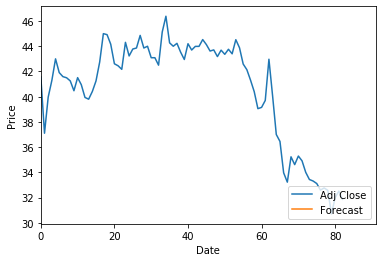

In [346]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
dfreg['Date'] = df.Date
last_date = datetime.strptime(dfreg.iloc[-1].Date, '%Y-%m-%d')
last_unix = last_date
next_unix = last_unix + timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [347]:
# KNN Regression
clfnn = KNeighborsRegressor(n_neighbors=2)
clfnn.fit(X_train, y_train)
clfnn.score(X_test, y_test)

-0.3039681469410511

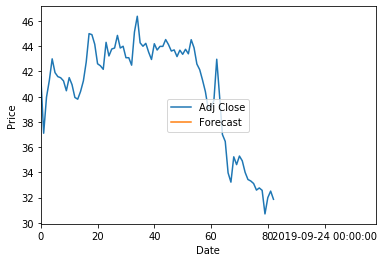

In [353]:
for i in clfnn.predict(X_lately):
    next_date = next_unix
    next_unix += timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=10)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [349]:
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)
clfpoly2.score(X_test, y_test)

0.38935310363134057

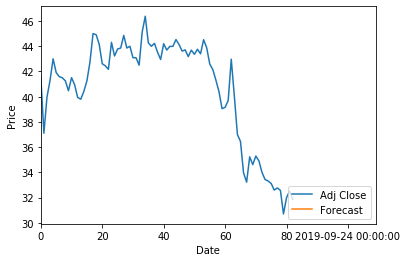

In [350]:
for i in clfpoly2.predict(X_lately):
    next_date = next_unix
    next_unix += timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()